# Imports

In [25]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

sys.path.append("../src")

# Loading data

In [2]:
train_path = "../data/selected_train.csv"
df_data = pd.read_csv(train_path, sep=",")

In [36]:
df_data.head(n=29)

,KLK3,ITIH2,SULT1C3,SCGB2A1,KLK2,LRP2,KLK3.1,CELSR1,SLC26A3,GRIK1,...,RAB3B,CLEC7A,ADCY2,SPHKAP,CNMD,SERHL2,HPGD,GLYATL1,FGFR4,label
0,3.984119,4.643010,3.984119,8.004603,3.984119,6.605385,3.984119,6.976595,4.742798,4.742798,...,4.643010,5.751396,5.366407,6.042517,4.366722,4.643010,3.984119,4.979502,4.366722,0
1,3.984119,3.984119,3.984119,7.454693,3.984119,7.620583,3.984119,7.746695,3.984119,4.907139,...,4.366282,6.164265,4.907139,6.837265,4.366282,4.741939,4.523022,4.366282,3.984119,0
2,3.984119,5.588960,3.984119,8.237920,4.816944,6.555290,3.984119,7.671801,4.816944,4.816944,...,5.146627,6.466886,6.638308,6.160291,3.984119,7.111343,3.984119,4.816944,5.588960,0
3,3.984119,5.285217,3.984119,8.749265,3.984119,8.702287,3.984119,8.191661,3.984119,6.560582,...,3.984119,6.115617,4.919178,6.189056,3.984119,4.650987,3.984119,3.984119,3.984119,0
4,3.984119,5.787031,3.984119,7.636661,3.984119,9.075697,3.984119,8.573623,4.968903,6.314672,...,3.984119,6.494848,4.559957,6.452012,3.984119,5.453445,4.793247,4.793247,4.559957,0
5,4.258127,6.344171,3.984119,7.001989,4.650372,6.767350,4.258127,8.636744,3.984119,5.491092,...,6.036121,5.552291,4.650372,6.455662,4.955123,5.735740,6.982217,4.457305,5.056912,0
6,3.984119,6.760162,3.984119,7.782982,3.984119,8.923943,3.984119,10.896686,4.398979,6.415713,...,5.612676,6.105564,5.372048,6.504932,5.060390,6.648229,4.805560,3.984119,5.848183,0
7,3.984119,4.464273,3.984119,6.115124,3.984119,7.764440,3.984119,7.708279,3.984119,4.808359,...,5.511617,6.226753,5.164837,7.357429,4.660097,5.758934,5.934728,4.262186,4.713174,0
8,3.984119,4.452793,3.984119,7.610873,4.316247,7.857384,3.984119,7.091460,3.984119,4.820973,...,5.624002,6.096455,5.193824,6.887625,4.390446,5.915380,5.173190,4.316247,4.851659,0
9,7.162207,3.984119,3.984119,6.640716,6.612412,4.569836,7.162207,6.448511,6.927997,4.298728,...,6.018072,6.429014,6.657423,6.276673,5.771988,5.704843,6.129379,5.152316,5.558001,1


In [4]:
df_features = df_data[df_data.columns.difference(['full_label', 'label'])]
df_labels   = df_data["label"]

In [5]:
X = df_features.values
y = df_labels.values

## Train test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
print("X_train shape:", X_train.shape)
print("X_test  shape:", X_test.shape)

X_train shape: (20, 56)
X_test  shape: (9, 56)


# GMM
## Define the model

In [8]:
gmm = GaussianMixture(n_components=3, covariance_type='full', max_iter=10_000)

## Fit data

In [9]:
gmm.fit(X_train, y_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=10000,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

## Test model

In [10]:
y_pred  = gmm.predict(X_test)
y_proba = gmm.predict_proba(X_test)

print("y test:", y_test)
print("y_pred:", y_pred)

y test: [0 1 1 0 0 0 2 0 0]
y_pred: [0 2 2 0 0 0 0 0 0]


## Confusion matrix

In [11]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[6, 0, 0],
       [0, 0, 2],
       [1, 0, 0]])

# GMM after PCA

## PCA over dataset 

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1','PC 2'])

In [14]:
finalDf = pd.concat([principalDf, df_data[['label']]], axis = 1)

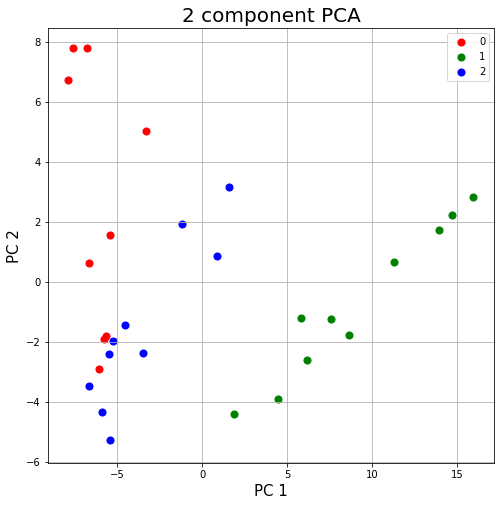

In [15]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## GMM over 2D PCA

In [16]:
X_pca = finalDf[finalDf.columns.difference(['full_label', 'label'])].values
y_pca = finalDf["label"].values

In [17]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.3)

## Fit data from PCA

In [28]:
gmm = GaussianMixture(n_components=3, covariance_type='full', max_iter=10_000, tol=1e-8, init_params="random")

In [33]:
gmm = gmm.fit(X_pca, y_pca)

## Test model

In [30]:
y_pred_pca  = gmm.predict(X_test_pca)
y_proba_pca = gmm.predict_proba(X_pca)

#print("y test:", y_test_pca)
print("y_proba:", y_proba_pca)
print("y", y_pred_pca)
print("y", y_pca)

y_proba: [[1.00000000e+000 6.22808750e-016 2.17370144e-085]
 [9.99999998e-001 2.32882987e-009 7.89440688e-168]
 [4.37916380e-005 9.99956208e-001 1.16310660e-260]
 [1.37754196e-007 9.99999862e-001 0.00000000e+000]
 [1.02306205e-006 9.99998977e-001 0.00000000e+000]
 [9.99962505e-001 3.74954169e-005 2.69477148e-175]
 [1.78700922e-006 9.99998213e-001 0.00000000e+000]
 [1.00000000e+000 2.35242911e-021 1.54915192e-066]
 [1.00000000e+000 1.28158745e-016 9.09635125e-085]
 [6.89828303e-043 4.43974071e-002 9.55602593e-001]
 [1.84061212e-062 5.80396126e-002 9.41960387e-001]
 [3.11670553e-031 6.57990613e-004 9.99342009e-001]
 [4.38818517e-129 2.28400081e-022 1.00000000e+000]
 [1.44058297e-145 6.53100074e-029 1.00000000e+000]
 [1.20027675e-119 2.01175479e-018 1.00000000e+000]
 [1.18902265e-053 5.90389009e-002 9.40961099e-001]
 [6.38446393e-089 3.96282055e-009 9.99999996e-001]
 [4.44025718e-017 4.73459010e-008 9.99999953e-001]
 [9.59489257e-040 9.96950989e-001 3.04901050e-003]
 [1.00000000e+000 3.83

## Confusion matrix

In [35]:
cm = confusion_matrix(y_test_pca, y_pred_pca)
cm

array([[1, 2, 0],
       [0, 0, 3],
       [3, 0, 0]])

## Contour 

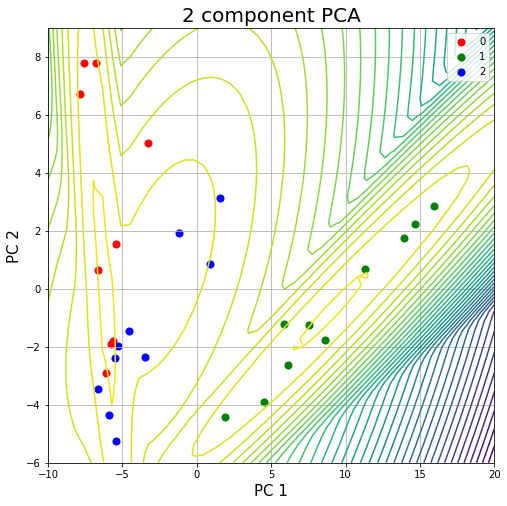

In [34]:
from matplotlib.colors import LogNorm

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Contour
X, Y = np.meshgrid(np.linspace(-10, 20), np.linspace(-6, 9))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((len(X),len(Y)))
ax.contour(X, Y, Z, levels=40)


plt.show()